In [69]:
import pandas as pd
import numpy as numpy
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df1=pd.read_csv('Content.csv')

In [5]:
df2 =pd.read_csv('ReactionTypes.csv')

In [6]:
df3 = pd.read_csv('Reactions.csv')

In [7]:
Content = df1[["Content ID","Category"]]

In [8]:
# Content.to_csv('Content.csv',index=False)

In [9]:
Reaction = df3[["Content ID","Type"]]


In [10]:
Reaction.isna().sum()

,0
Content ID,0
Type,980


In [11]:
Reaction = Reaction.dropna()

In [12]:
Reaction.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24573 entries, 1 to 25552
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24573 non-null  object
 1   Type        24573 non-null  object
dtypes: object(2)
memory usage: 575.9+ KB


In [13]:
# Reaction.to_csv('Reaction.csv',index=False)

In [14]:
Reaction_Types = df2[["Type","Score"]]
Reaction_Types.head()

,Type,Score
0,heart,60
1,want,70
2,disgust,0
3,hate,5
4,interested,30


In [15]:
Reaction_Types.to_csv('Reaction_Types.csv',index=False)

In [16]:
Content_Reaction = pd.merge(Content,Reaction, on="Content ID" ,how="outer")

In [17]:

Content_Reaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24611 entries, 0 to 24610
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Content ID  24611 non-null  object
 1   Category    24611 non-null  object
 2   Type        24573 non-null  object
dtypes: object(3)
memory usage: 576.9+ KB


In [18]:
Final = pd.merge(Content_Reaction, Reaction_Types, on="Type", how="outer")

In [19]:
Final.sample(10)

,Content ID,Category,Type,Score
22657,b62831cc-7447-465b-9c58-1fc659b17310,animals,want,70.0
21025,a412c4fa-42c9-4bd8-a2d7-1ad1dcbe9615,dogs,super love,75.0
19283,888660b0-7dd8-4983-858a-101cd03d392b,science,scared,15.0
81,0da2523f-acc4-4687-9844-45eaa5e90c65,technology,adore,72.0
7983,2e84726a-e69f-44e8-ac0f-c4a31516e342,dogs,heart,60.0
17883,a1d33ddd-1a6c-4dc2-afe1-bcf632cf0ce4,food,peeking,35.0
5860,d200b97e-f661-4502-80d1-1e458816d558,science,dislike,10.0
12646,36d36f19-7a10-4d7d-a3ab-a3f2cbbfcf4a,food,intrigued,45.0
8358,693b5f91-52b1-4464-916c-91adccbec996,culture,heart,60.0
21799,29d7781c-9302-4269-91f3-c23afb33467a,public speaking,want,70.0


In [20]:
category_score = Final.groupby('Category')['Score'].sum().reset_index()

In [21]:
Result= category_score.sort_values(by='Score',ascending=False).reset_index(drop=True)

In [22]:
print(Result)

           Category    Score
0           animals  71242.0
1    healthy eating  69067.0
2        technology  68521.0
3           science  66549.0
4           culture  64952.0
5           cooking  64756.0
6            travel  63788.0
7              food  63172.0
8         education  56041.0
9            soccer  55152.0
10         studying  52928.0
11             dogs  52511.0
12           tennis  50339.0
13          fitness  49835.0
14         veganism  48975.0
15  public speaking  47928.0
16          Fitness   5488.0
17          Science   4619.0
18          Animals   3723.0
19             Food   3504.0
20           Soccer   2631.0
21          Culture   1627.0
22        Education   1395.0
23         Studying   1341.0
24  Public Speaking   1336.0
25           Travel   1092.0
26         Veganism    644.0
27   Healthy Eating    272.0
28       Technology    217.0


In [23]:
# Result.to_csv('Result.csv',index=False)

In [25]:
df = pd.read_csv("Task 3_Final Content Data set.csv")

In [26]:
df.head()

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,7/11/20 9:43,photo,studying,negative,0
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,17/6/21 12:22,photo,studying,negative,10
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,18/4/21 5:13,photo,studying,negative,15
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,6/1/21 19:13,photo,studying,negative,0
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,23/8/20 12:25,photo,studying,positive,30


In [27]:
df['Category'].value_counts()

,count
Category,
animals,1897
science,1796
healthy eating,1717
food,1699
technology,1698
culture,1676
cooking,1664
travel,1647
soccer,1457


Text(0, 0.5, '')

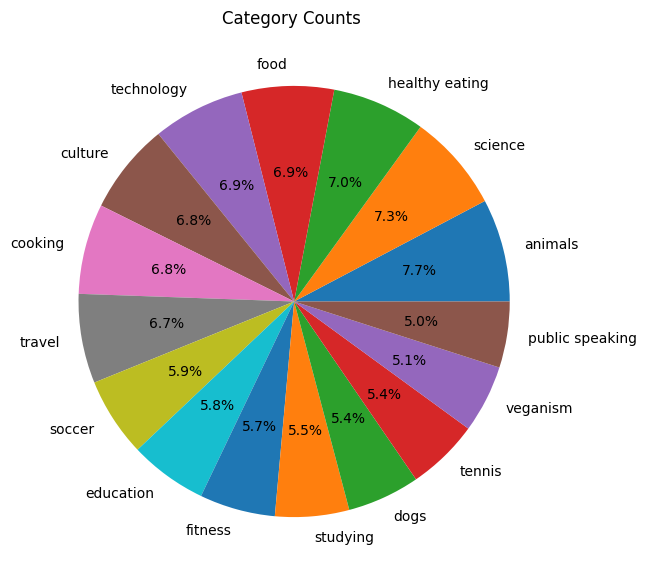

In [89]:
# Plotting the pie chart
plt.figure(figsize=(12, 7))
df['Category'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('Category Counts ')
plt.ylabel('')  # Hide the y-label for a cleaner pie chart

Text(0, 0.5, 'Count')

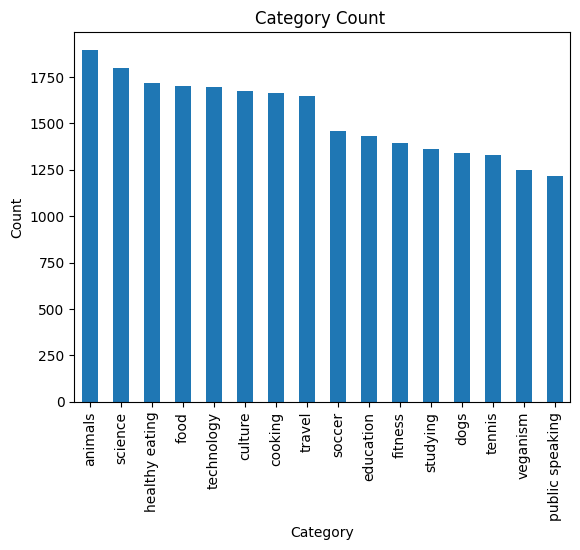

In [90]:
df['Category'].value_counts().plot(kind='bar')
plt.title('Category Count ')
plt.xlabel('Category')
plt.ylabel('Count')

In [30]:
category_score = df.groupby('Category')['Score'].sum().reset_index()

In [31]:
Result= category_score.sort_values(by='Score',ascending=False).reset_index(drop=True)

In [32]:
print(Result)

           Category  Score
0           animals  74965
1           science  71168
2    healthy eating  69339
3        technology  68738
4              food  66676
5           culture  66579
6            travel  64880
7           cooking  64756
8            soccer  57783
9         education  57436
10          fitness  55323
11         studying  54269
12             dogs  52511
13           tennis  50339
14         veganism  49619
15  public speaking  49264


In [60]:
(df['Category']== 'animals').sum()

1897

In [61]:
animal_reactions = df[df['Category'] == 'animals']

In [62]:
# Find the unique values in the 'Reaction Type' column for 'animals' category
unique_reaction_types = animal_reactions['Reaction Type'].unique()

In [64]:
reaction_type_counts = animal_reactions['Reaction Type'].value_counts()

In [68]:
# Display the unique reaction types and their counts
print("Unique Reaction Types:", unique_reaction_types)
print("\nReaction Type Counts:\n", reaction_type_counts)

Unique Reaction Types: ['cherish' 'intrigued' 'like' 'love' 'hate' 'scared' 'adore' 'indifferent'
 'dislike' 'heart' 'interested' 'disgust' 'peeking' 'worried' 'want'
 'super love']

Reaction Type Counts:
 Reaction Type
scared         132
peeking        129
hate           128
cherish        125
super love     123
disgust        122
want           122
worried        121
heart          120
love           119
intrigued      116
dislike        115
adore          114
interested     110
like           101
indifferent    100
Name: count, dtype: int64


Text(0, 0.5, 'Count')

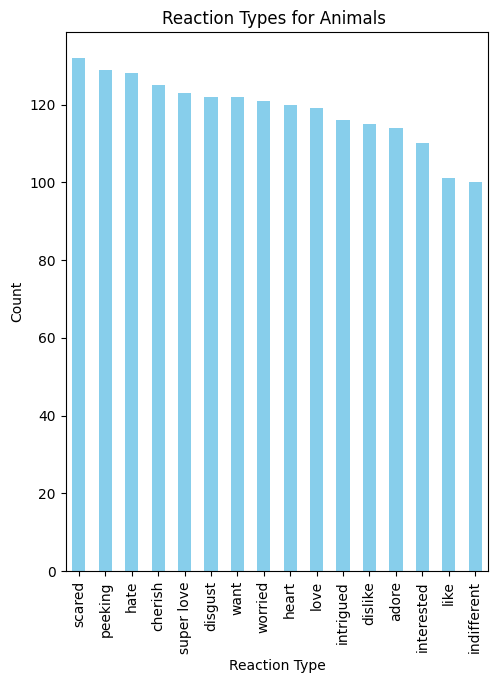

In [88]:
# Plotting the bar chart
plt.figure(figsize=(12, 7))

# Bar Chart
plt.subplot(1, 2, 1)  # Create a 1x2 subplot for bar and pie chart
reaction_type_counts.plot(kind='bar', color='skyblue')
plt.title('Reaction Types for Animals ')
plt.xlabel('Reaction Type')
plt.ylabel('Count')


Text(0, 0.5, '')

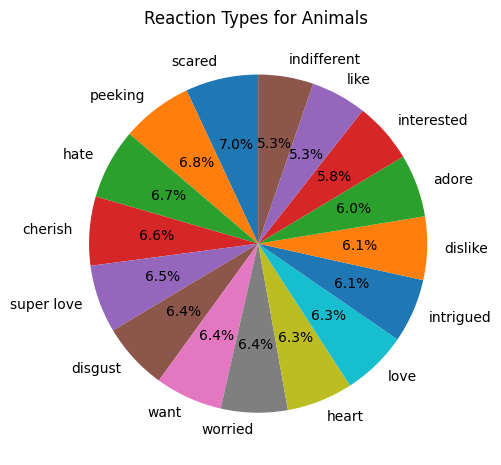

In [87]:
# Plotting the pie chart
plt.figure(figsize=(12, 7))
plt.subplot(1, 2, 2)  # Second plot in the 1x2 grid
reaction_type_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90)
plt.title('Reaction Types for Animals ')
plt.ylabel('')  # Hide the y-label for a cleaner pie chart

In [44]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

<ipython-input-44-8e72c5e364bc>:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Datetime'] = pd.to_datetime(df['Datetime'])


In [66]:
# Create separate 'Date' and 'Time' columns
df['Date'] = df['Datetime'].dt.date
df['Time'] = df['Datetime'].dt.time

In [67]:
df

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Date,Time,Year,Month
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,2020-07-11,09:43:00,2020,July
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,2021-06-17,12:22:00,2021,June
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,2021-04-18,05:13:00,2021,April
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,2021-06-01,19:13:00,2021,June
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,2020-08-23,12:25:00,2020,August
...,...,...,...,...,...,...,...,...,...,...,...,...
24568,24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:00,audio,technology,negative,10,2020-06-27,09:46:00,2020,June
24569,24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:00,audio,technology,positive,45,2021-02-16,17:17:00,2021,February
24570,24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-12-09 03:54:00,audio,technology,positive,30,2020-12-09,03:54:00,2020,December
24571,24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-04-11 20:08:00,audio,technology,negative,12,2020-04-11,20:08:00,2020,April


In [47]:
# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], format='%y/%m/%d')

In [53]:
# Extract the month name and year
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.strftime('%B')  # '%B' gives the full month name

In [54]:
df

,Unnamed: 0,Content ID,Reaction Type,Datetime,Content Type,Category,Sentiment,Score,Date,Time,Year,Month
0,0,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2020-07-11 09:43:00,photo,studying,negative,0,2020-07-11,09:43:00,2020,July
1,1,97522e57-d9ab-4bd6-97bf-c24d952602d2,dislike,2021-06-17 12:22:00,photo,studying,negative,10,2021-06-17,12:22:00,2021,June
2,2,97522e57-d9ab-4bd6-97bf-c24d952602d2,scared,2021-04-18 05:13:00,photo,studying,negative,15,2021-04-18,05:13:00,2021,April
3,3,97522e57-d9ab-4bd6-97bf-c24d952602d2,disgust,2021-06-01 19:13:00,photo,studying,negative,0,2021-06-01,19:13:00,2021,June
4,4,97522e57-d9ab-4bd6-97bf-c24d952602d2,interested,2020-08-23 12:25:00,photo,studying,positive,30,2020-08-23,12:25:00,2020,August
...,...,...,...,...,...,...,...,...,...,...,...,...
24568,24568,75d6b589-7fae-4a6d-b0d0-752845150e56,dislike,2020-06-27 09:46:00,audio,technology,negative,10,2020-06-27,09:46:00,2020,June
24569,24569,75d6b589-7fae-4a6d-b0d0-752845150e56,intrigued,2021-02-16 17:17:00,audio,technology,positive,45,2021-02-16,17:17:00,2021,February
24570,24570,75d6b589-7fae-4a6d-b0d0-752845150e56,interested,2020-12-09 03:54:00,audio,technology,positive,30,2020-12-09,03:54:00,2020,December
24571,24571,75d6b589-7fae-4a6d-b0d0-752845150e56,worried,2020-04-11 20:08:00,audio,technology,negative,12,2020-04-11,20:08:00,2020,April


In [55]:
df['Month'].value_counts()

,count
Month,
January,2142
July,2116
May,2110
December,2099
October,2087
June,2068
August,2055
November,2055
September,1991


Text(0, 0.5, '')

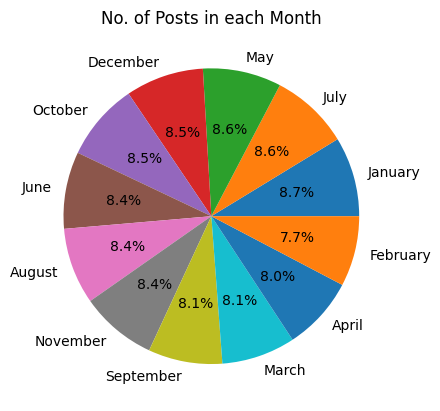

In [92]:
df['Month'].value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.title('No. of Posts in each Month')
plt.ylabel('')  # Hide the y-label for a cleaner pie chart